In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score, fbeta_score
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")


In [170]:
df = pd.read_csv('/Users/suchen/Desktop/Data1030 HW/dermatology_database_1.csv')

In [53]:
print(df.iloc[:,33])

0      55
1       8
2      26
3      40
4      45
       ..
361    25
362    36
363    28
364    50
365    35
Name: age, Length: 366, dtype: object


In [52]:
df.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [160]:
df1 = df.iloc[:, list(range(0, 11)) + [33]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   erythema                    366 non-null    int64 
 1   scaling                     366 non-null    int64 
 2   definite_borders            366 non-null    int64 
 3   itching                     366 non-null    int64 
 4   koebner_phenomenon          366 non-null    int64 
 5   polygonal_papules           366 non-null    int64 
 6   follicular_papules          366 non-null    int64 
 7   oral_mucosal_involvement    366 non-null    int64 
 8   knee_and_elbow_involvement  366 non-null    int64 
 9   scalp_involvement           366 non-null    int64 
 10  family_history              366 non-null    int64 
 11  age                         366 non-null    object
dtypes: int64(11), object(1)
memory usage: 34.4+ KB


In [172]:
import pandas as pd

# see the class distribution of the target variable without correct order
class_distribution = df1['erythema'].value_counts()

# see the class distribution of the target variable with correct order
correct_order = [0,1,2,3]

pd.value_counts(df1['erythema']).reindex(correct_order)



erythema
0      4
1     57
2    215
3     90
Name: count, dtype: int64

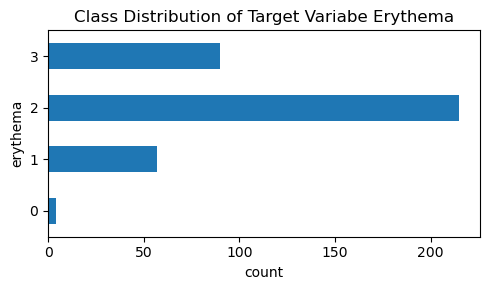

In [174]:
plt.figure(figsize=(5,3))

pd.value_counts(df1['erythema']).reindex(correct_order).plot.barh()
plt.xlabel('count')
plt.ylabel('erythema')
plt.title('Class Distribution of Target Variabe Erythema')
plt.tight_layout()

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/eda_target.png'
plt.savefig(file_path, dpi=350)


plt.show()

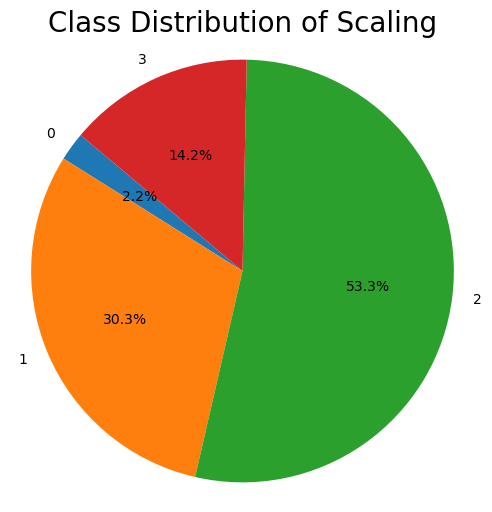

In [175]:
class_counts = pd.value_counts(df1['scaling']).reindex(correct_order)

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=correct_order, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Scaling', fontsize = 20)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/eda_scaling.png'
plt.savefig(file_path, dpi=350)

plt.show()


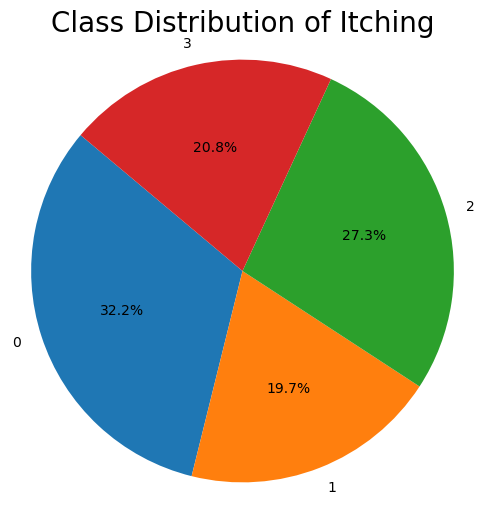

In [176]:
class_counts01 = pd.value_counts(df1['itching']).reindex(correct_order)

plt.figure(figsize=(6, 6))
plt.pie(class_counts01, labels=correct_order, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Itching', fontsize = 20)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/eda_itching.png'
plt.savefig(file_path, dpi=350)

plt.show()
s

In [74]:
count_matrix = df1.groupby(['itching', 'erythema']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

erythema  0   1   2   3
itching                
0         1  15  70  32
1         1  16  40  15
2         1  12  58  29
3         1  14  47  14
erythema         0         1         2         3
itching                                         
0         0.008475  0.127119  0.593220  0.271186
1         0.013889  0.222222  0.555556  0.208333
2         0.010000  0.120000  0.580000  0.290000
3         0.013158  0.184211  0.618421  0.184211


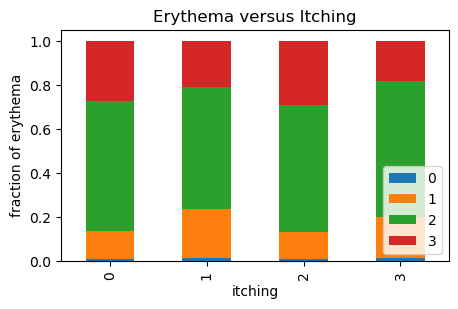

In [166]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of erythema')
plt.title('Erythema versus Itching')
plt.legend(loc=4)
plt.show()

In [177]:
count_matrix01 = df1.groupby(['scaling', 'erythema']).size().unstack()
#print(count_matrix01)

count_matrix_norm01 = count_matrix01.div(count_matrix01.sum(axis=1),axis=0)
#print(count_matrix_norm)

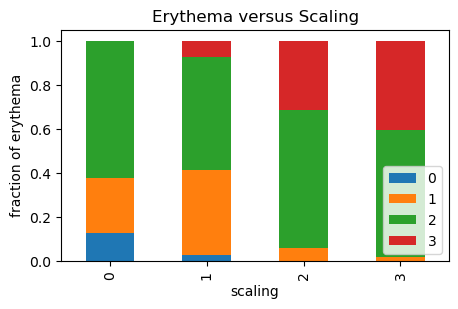

In [178]:
count_matrix_norm01.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of erythema')
plt.title('Erythema versus Scaling')
plt.legend(loc=4)

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/eda_ery_scal.png'
plt.savefig(file_path, dpi=350)

plt.show()

In [109]:
count_matrix02 = df1.groupby(['family_history', 'erythema']).size().unstack()
#print(count_matrix01)

count_matrix_norm02 = count_matrix02.div(count_matrix02.sum(axis=1),axis=0)
#print(count_matrix_norm)

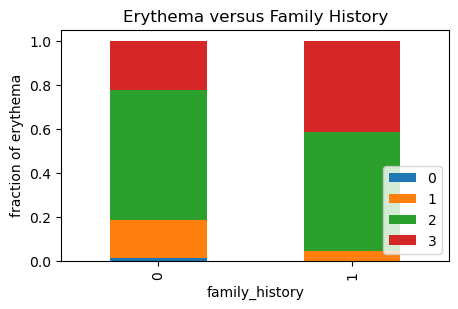

In [168]:
count_matrix_norm02.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of erythema')
plt.title('Erythema versus Family History')
plt.legend(loc=4)
plt.show()

In [87]:

pd.set_option('display.max_rows', None)
print(df['age'])

0      55
1       8
2      26
3      40
4      45
5      41
6      18
7      57
8      22
9      30
10     20
11     21
12     22
13     10
14     65
15     40
16     30
17     38
18     23
19     17
20      8
21     51
22     42
23     44
24     22
25     33
26     10
27     17
28     43
29     50
30     50
31     10
32     34
33      ?
34      ?
35      ?
36      ?
37     15
38     26
39     46
40     51
41     62
42     15
43     35
44     30
45     48
46     46
47     12
48     52
49     60
50     32
51     35
52     41
53     48
54     51
55     19
56     22
57     29
58     25
59     33
60      8
61     40
62     33
63     42
64     36
65     60
66     36
67     21
68     40
69     21
70     34
71     13
72     52
73     48
74     17
75     25
76     33
77     62
78     52
79     27
80     40
81     31
82     27
83     10
84     55
85     30
86     42
87     48
88     22
89     31
90     50
91     43
92     30
93     42
94     22
95     18
96     35
97     60
98     28
99     13


In [117]:
X = df1.loc[:, df1.columns != 'erythema']
y = df1['erythema']

X.columns



Index(['scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
       'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
       'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
       'age'],
      dtype='object')

In [98]:
random_state = 42



# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array([0, 1, 2, 3]), array([ 1, 12, 43, 18]))
new fold
(array([0, 1, 2, 3]), array([  2,  30, 114,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 58, 24]))
new fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))
new fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))


In [112]:
# one hot encoder for family history

# let's collect all categorical features first
onehot_ftrs = ['family_history']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('feature names:',enc.get_feature_names_out(onehot_ftrs))
print(len(enc.get_feature_names_out(onehot_ftrs)))

feature names: ['family_history_0' 'family_history_1']
2


/Users/suchen/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
# transform X_train
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('transformed val features:')
print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('transformed test features:')
print(onehot_test)

transformed train features:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]


In [125]:
# ordinal encoder to other attributes

symptoms = [
    "scaling",
    "definite_borders",
    "itching",
    "koebner_phenomenon",
    "polygonal_papules",
    "follicular_papules",
    "oral_mucosal_involvement",
    "knee_and_elbow_involvement",
    "scalp_involvement"
]

degree = [0,1,2,3]
# initialize the encoder
ordinal_ftrs = symptoms # if you have more than one ordinal feature, add the feature names here
ordinal_cats = [degree, degree, degree, degree, degree, degree, degree, degree, degree]
# ordinal_cats must contain one list per ordinal feature! each list contains the ordered list of categories 
# of the corresponding feature

enc = OrdinalEncoder(categories = ordinal_cats)   # By default, the categories are alphabetically ordered
                                                    # which is NOT what you want usually.

# fit the training data
enc.fit(X_train[ordinal_ftrs])  # the encoder expects a 2D array, that's why the column name is in a list

# transform X_train. We could use enc.fit_transform(X_train) to combine fit and transform
ordinal_train = enc.transform(X_train[ordinal_ftrs])
print('transformed train features:')
print(ordinal_train)
# transform X_val
ordinal_val = enc.transform(X_val[ordinal_ftrs])
print('transformed validation features:')
print(ordinal_val)
# transform X_test
ordinal_test = enc.transform(X_test[ordinal_ftrs])
print('transformed test features:')
print(ordinal_test)

transformed train features:
[[2. 3. 3. ... 2. 0. 0.]
 [2. 2. 2. ... 3. 0. 0.]
 [2. 2. 2. ... 1. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [2. 2. 0. ... 0. 1. 1.]
 [2. 2. 3. ... 2. 0. 0.]]
transformed validation features:
[[1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [3. 3. 0. 0. 0. 0. 0. 1. 1.]
 [2. 2. 1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 3. 2.]
 [1. 3. 1. 2. 3. 0. 2. 0. 0.]
 [2. 1. 0. 0. 0. 2. 0. 2. 0.]
 [3. 3. 0. 0. 0. 0. 0. 3. 3.]
 [2. 2. 0. 0. 0. 3. 0. 1. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 1. 0. 0. 0. 0. 0.]
 [3. 2. 0. 0. 0. 0. 0. 2. 2.]
 [2. 2. 0. 0. 0. 1. 0. 1. 0.]
 [2. 2. 0. 0. 0. 0. 0. 2. 2.]
 [2. 2. 1. 0. 0. 0. 0. 1. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 1.]
 [2. 2. 0. 1. 0. 0. 0. 0. 0.]
 [2. 2. 0. 1. 0. 0. 0. 0. 0.]
 [2. 2. 2. 3. 2. 0. 2. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 3. 0. 0. 0. 0. 0. 0.]
 [2. 3. 3. 1. 2. 0. 2. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0. 0. 0.]
 [3. 0. 3. 0. 0. 0. 0. 0. 2.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 2. 0. 0. 0. 0. 0. 0.]
 [3. 2. 0. 1. 0. 0. 0. 2. 3.]
 [2

In [136]:
X01 = df1.loc[:, df1.columns != 'erythema']
y01 = df1['erythema']

In [138]:
random_state = 42



# stratified train-test split
X_other1, X_test1, y_other1, y_test1 = train_test_split(X01,y01,test_size = 0.2,stratify=y01,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other1,y_other1):
    print('new fold')
    X_train1 = X_other1.iloc[train_index]
    y_train1 = y_other1.iloc[train_index]
    X_val1 = X_other1.iloc[val_index]
    y_val1 = y_other1.iloc[val_index]
    print(np.unique(y_train1,return_counts=True))
    print(np.unique(y_val1,return_counts=True))

test balance: (array([0, 1, 2, 3]), array([ 1, 12, 43, 18]))
new fold
(array([0, 1, 2, 3]), array([  2,  30, 114,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 58, 24]))
new fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))
new fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))


In [154]:

print(X_train1.shape[0])
print(ordinal_train.shape[0])

print(X_train1.shape[1])
print(ordinal_train.shape[1])

195
195
11
9


In [155]:
print(X_test1.shape[0])
print(ordinal_test.shape[0])

print(X_test1.shape[1])
print(ordinal_test.shape[1])

74
74
11
9


In [156]:
print(X_val1.shape[0])
print(ordinal_val.shape[0])

print(X_val1.shape[1])
print(ordinal_val.shape[1])

97
97
11
9


In [161]:
df11 = df1

df11.replace('?', np.nan, inplace=True)

# Calculate the fraction of missing values for each column df.isnull().mean()


print(df11['age'].isnull().mean())


/var/folders/fv/xfwfslxx7hj7m40k0dggq8pm0000gn/T/ipykernel_96876/3936423857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.replace('?', np.nan, inplace=True)


0.02185792349726776

In [163]:
missing_fraction_per_column = df11.isnull().mean()

# Calculate the fraction of missing values for the entire dataset
missing_fraction_total = missing_fraction_per_column.mean()

missing_fraction_total

0.0018214936247723133

In [170]:
df['age']

0      55
1       8
2      26
3      40
4      45
5      41
6      18
7      57
8      22
9      30
10     20
11     21
12     22
13     10
14     65
15     40
16     30
17     38
18     23
19     17
20      8
21     51
22     42
23     44
24     22
25     33
26     10
27     17
28     43
29     50
30     50
31     10
32     34
33      ?
34      ?
35      ?
36      ?
37     15
38     26
39     46
40     51
41     62
42     15
43     35
44     30
45     48
46     46
47     12
48     52
49     60
50     32
51     35
52     41
53     48
54     51
55     19
56     22
57     29
58     25
59     33
60      8
61     40
62     33
63     42
64     36
65     60
66     36
67     21
68     40
69     21
70     34
71     13
72     52
73     48
74     17
75     25
76     33
77     62
78     52
79     27
80     40
81     31
82     27
83     10
84     55
85     30
86     42
87     48
88     22
89     31
90     50
91     43
92     30
93     42
94     22
95     18
96     35
97     60
98     28
99     13


In [ ]:
# final project 
# -----------------------
# ------------------------
# -----------------------


In [ ]:
# final project
# start over and split the data again 
# so that the codes of final are separated from codes of midterm

In [81]:
df2 = pd.read_csv('/Users/suchen/Desktop/Data1030 HW/dermatology_database_1.csv')
# make a subset of the data, removing the "medical terms" features because they are too academic to understand
df3 = df2.iloc[:, list(range(0, 11)) + [33]]
#df1.info()

# create x and target variable y
X_final = df3.loc[:, df3.columns != 'erythema']
y_final = df3['erythema']




In [72]:
# Assuming you have already loaded your data and created the X_final DataFrame

# Change the integer values in 'erythema' to strings
# Assuming you have already loaded your data and created the X_final DataFrame

# Change the integer values in 'erythema' to strings with a prefix
#y_final = "class " + df3['erythema'].astype(str)

# Now y_final contains the values as strings with the "class" prefix


# Now y_final contains the values as strings


In [79]:
y_final

0      2
1      3
2      2
3      2
4      2
      ..
361    2
362    3
363    3
364    2
365    3
Name: erythema, Length: 366, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import pandas as pd



# Replace '?' with NaN and convert columns to numeric where appropriate
X_final = X_final.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')

# Define random state
random_state = 42

# Stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(
    X_final, y_final, test_size=0.2, stratify=y_final, random_state=random_state)
print('Test balance:', np.unique(y_test, return_counts=True))

# Stratified K-Fold on X_other
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

for train_index, val_index in kf.split(X_other, y_other):
    print('New fold')
    
    # Split the data into training and validation sets
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    # Instantiate the imputer
    iterative_imputer = IterativeImputer(random_state=random_state)

    # Fit the imputer on X_train and transform X_train
    X_train_imputed = iterative_imputer.fit_transform(X_train)

    # Transform X_val using the already fitted imputer
    X_val_imputed = iterative_imputer.transform(X_val)

    # Convert the imputed data back into pandas DataFrames
    X_train = pd.DataFrame(X_train_imputed, columns=X_final.columns)
    X_val = pd.DataFrame(X_val_imputed, columns=X_final.columns)

    print(np.unique(y_train, return_counts=True))
    print(np.unique(y_val, return_counts=True))

# Transform X_test using the imputer fitted on the last fold of X_other
X_test_imputed = iterative_imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed, columns=X_final.columns)


Test balance: (array([0, 1, 2, 3]), array([ 1, 12, 43, 18]))
New fold
(array([0, 1, 2, 3]), array([  2,  30, 114,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 58, 24]))
New fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))
New fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))


In [83]:
# Calculate the fraction of missing values in each column of X_train
missing_fraction = X_train.isna().sum() / len(X_train)

# Optionally, convert to percentage
missing_percentage = missing_fraction * 100

# Display the result
print(missing_fraction)  # or print(missing_percentage) for percentage


scaling                       0.0
definite_borders              0.0
itching                       0.0
koebner_phenomenon            0.0
polygonal_papules             0.0
follicular_papules            0.0
oral_mucosal_involvement      0.0
knee_and_elbow_involvement    0.0
scalp_involvement             0.0
family_history                0.0
age                           0.0
dtype: float64


In [84]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

def MLpipe_KFold_RMSE(X_train, X_test, y_train, y_test, 
                      preprocessor, algorithm, param_grid, 
                      algorithm_random_state=None):
    """
    This function applies KFold with 4 folds to the training data and uses GridSearchCV for hyperparameter tuning.
    The RMSE is minimized in cross-validation.

    Parameters:
    - X_train, X_test: Pre-split feature matrices
    - y_train, y_test: Pre-split target variables
    - preprocessor: Combined preprocessor for one-hot encoding, ordinal encoding, and standard scaling
    - algorithm: Initialized ML algorithm (e.g., Lasso regression)
    - param_grid: Parameter grid for GridSearchCV
    - algorithm_random_state: Optional list of random states for the algorithm

    Returns:
    - best_models: List of best models from each random state
    - test_scores: List of corresponding test scores
    """
    # If algorithm_random_state is None, use a range of random states
    if algorithm_random_state is None:
        random_states = np.arange(10)  # 10 different random states
    else:
        random_states = algorithm_random_state
        
    best_models = []
    test_scores = []
    all_predictions = []

    # Check if the algorithm has a 'random_state' parameter
    algorithm_has_random_state = 'random_state' in algorithm.get_params()

    for random_state in random_states:
        print(f"Random State: {random_state}")

        # KFold with 4 folds
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        # Initialize pipeline with the combined preprocessor and algorithm
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('algorithm', algorithm)
        ])

        # Set algorithm's random state if applicable
        if algorithm_has_random_state and random_state is not None:
            algorithm.set_params(**{'random_state': random_state})

        # GridSearchCV
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Print GridSearchCV results
        print(f"Best parameters: {grid_search.best_params_}")

        # Predict on the test set
        y_pred = grid_search.predict(X_test)
        all_predictions.append(y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        test_scores.append(rmse)
        print(f"Test RMSE: {rmse}\n")

        # Save the best model
        best_models.append(grid_search.best_estimator_)

    # Print mean and standard deviation of test scores
    print(f"Mean Test RMSE: {np.mean(test_scores)}")
    print(f"Standard Deviation of Test RMSE: {np.std(test_scores)}")
    #print(y_pred)

    return best_models, test_scores, all_predictions



In [85]:
# Create an empty DataFrame with the desired columns
results_df = pd.DataFrame(columns=['Model Name', 'Mean of RMSE', 'SD of RMSE'])


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor 

# One-Hot Encoding Preprocessor
onehot_ftrs = ['family_history']
one_hot_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_ftrs)
    ])


# Symptoms and their degree categories
symptoms = [
    "scaling",
    "definite_borders",
    "itching",
    "koebner_phenomenon",
    "polygonal_papules",
    "follicular_papules",
    "oral_mucosal_involvement",
    "knee_and_elbow_involvement",
    "scalp_involvement"
]

degree = [0, 1, 2, 3]

# Each symptom has the same set of categories
ordinal_cats = [degree] * len(symptoms)

# Initialize the Ordinal Encoder with specified categories
enc = OrdinalEncoder(categories=ordinal_cats)

# Using ColumnTransformer with column names
ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', enc, symptoms)
    ])

# Standard Scaler
standard_scaler = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['age'])
    ])


combined_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_ftrs),  # One-Hot Encoding
        ('ordinal', enc, symptoms),                # Ordinal Encoding
        ('scaler', StandardScaler(), ['age'])      # Standard Scaling
    ])

print('random forest')
print()

# Random Forest Algorithm
random_forest = RandomForestRegressor()  # Initialize RandomForestRegressor

param_grid_rf = {
    'algorithm__n_estimators': [100, 300, 400],   # Example hyperparameters
    'algorithm__max_depth': [None, 20, 40],       # Example hyperparameters 10，20
    'algorithm__min_samples_split': [10, 30, 60]    # Example hyperparameters 2，5，10
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=random_forest, param_grid=param_grid_rf
)




random forest

Random State: 0
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 10, 'algorithm__n_estimators': 400}
Test RMSE: 0.6414714745793272

Random State: 1
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 10, 'algorithm__n_estimators': 100}
Test RMSE: 0.6512050500402599

Random State: 2
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 30, 'algorithm__n_estimators': 400}
Test RMSE: 0.615276081384775

Random State: 3
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 60, 'algorithm__n_estimators': 300}
Test RMSE: 0.6123720148359012

Random State: 4
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 60, 'algorithm__n_estimators': 400}
Test RMSE: 0.6113659997799069

Random State: 5
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 60, 'algorithm__n_estimators': 400}
Test RMSE: 0.6116375837968588

Random S

In [87]:
# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'random forest'
md
# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

In [88]:
from sklearn.linear_model import Lasso

print('Lasso Regression')
print()

# Lasso Regression Algorithm
lasso = Lasso()  # Initialize Lasso

param_grid_lasso = {
    'algorithm__alpha': [0.001, 0.01, 0.1, 1, 10, 20]   # Example hyperparameters
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=lasso, param_grid=param_grid_lasso
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'Lasso'

# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

Lasso Regression

Random State: 0
Best parameters: {'algorithm__alpha': 0.001}
Test RMSE: 0.643099967121582

Random State: 1
Best parameters: {'algorithm__alpha': 0.001}
Test RMSE: 0.643099967121582

Random State: 2
Best parameters: {'algorithm__alpha': 0.001}
Test RMSE: 0.643099967121582

Random State: 3
Best parameters: {'algorithm__alpha': 0.01}
Test RMSE: 0.6160239002901914

Random State: 4
Best parameters: {'algorithm__alpha': 0.01}
Test RMSE: 0.6160239002901914

Random State: 5
Best parameters: {'algorithm__alpha': 0.01}
Test RMSE: 0.6160239002901914

Random State: 6
Best parameters: {'algorithm__alpha': 0.001}
Test RMSE: 0.643099967121582

Random State: 7
Best parameters: {'algorithm__alpha': 0.001}
Test RMSE: 0.643099967121582

Random State: 8
Best parameters: {'algorithm__alpha': 0.1}
Test RMSE: 0.6189957261133908

Random State: 9
Best parameters: {'algorithm__alpha': 0.001}
Test RMSE: 0.643099967121582

Mean Test RMSE: 0.6325667229713458
Standard Deviation of Test RMSE: 0.012

In [109]:
results_df

,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.647258,0.003724
1,Lasso,0.632567,0.012926


In [89]:
from sklearn.linear_model import Ridge

print('Ridge Regression')
print()

# Ridge Regression Algorithm
ridge = Ridge()  # Initialize Ridge

param_grid_ridge = {
    'algorithm__alpha': [0.001, 0.01, 0.1, 5, 20, 30]   # Example hyperparameters
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=ridge, param_grid=param_grid_ridge
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'Ridge'

# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

Ridge Regression

Random State: 0
Best parameters: {'algorithm__alpha': 20}
Test RMSE: 0.6165012335916666

Random State: 1
Best parameters: {'algorithm__alpha': 5}
Test RMSE: 0.6329959915342647

Random State: 2
Best parameters: {'algorithm__alpha': 5}
Test RMSE: 0.6329959915342647

Random State: 3
Best parameters: {'algorithm__alpha': 20}
Test RMSE: 0.6165012335916666

Random State: 4
Best parameters: {'algorithm__alpha': 20}
Test RMSE: 0.6165012335916666

Random State: 5
Best parameters: {'algorithm__alpha': 20}
Test RMSE: 0.6165012335916666

Random State: 6
Best parameters: {'algorithm__alpha': 5}
Test RMSE: 0.6329959915342647

Random State: 7
Best parameters: {'algorithm__alpha': 5}
Test RMSE: 0.6329959915342647

Random State: 8
Best parameters: {'algorithm__alpha': 20}
Test RMSE: 0.6165012335916666

Random State: 9
Best parameters: {'algorithm__alpha': 5}
Test RMSE: 0.6329959915342647

Mean Test RMSE: 0.6247486125629657
Standard Deviation of Test RMSE: 0.008247378971299013


In [167]:
from sklearn.linear_model import ElasticNet

print('Elastic Net Regression')
print()

# Elastic Net Regression Algorithm
elastic_net = ElasticNet()  # Initialize Elastic Net

param_grid_elastic_net = {
    'algorithm__alpha': [0.005, 0.01, 0.015, 0.02, 10, 100],   # Example hyperparameters
    'algorithm__l1_ratio': [0.3, 0.5, 0.9]               # Example hyperparameters
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=elastic_net, param_grid=param_grid_elastic_net
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'Elastic Net'

# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

Elastic Net Regression

Random State: 0
Best parameters: {'algorithm__alpha': 0.01, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.6332536488698115

Random State: 1
Best parameters: {'algorithm__alpha': 0.015, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.6274284756293566

Random State: 2
Best parameters: {'algorithm__alpha': 0.01, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.6332536488698115

Random State: 3
Best parameters: {'algorithm__alpha': 0.02, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.622371052257872

Random State: 4
Best parameters: {'algorithm__alpha': 0.02, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.622371052257872

Random State: 5
Best parameters: {'algorithm__alpha': 0.02, 'algorithm__l1_ratio': 0.5}
Test RMSE: 0.6141118033950913

Random State: 6
Best parameters: {'algorithm__alpha': 0.015, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.6274284756293566

Random State: 7
Best parameters: {'algorithm__alpha': 0.015, 'algorithm__l1_ratio': 0.3}
Test RMSE: 0.6274284756293566

Random State: 8
Best pa

In [90]:
from sklearn.svm import SVR

print('Support Vector Regression (SVR)')
print()

# SVR Algorithm
svr = SVR()  # Initialize SVR

param_grid_svr = {
    'algorithm__C': [0.001, 0.01, 0.1, 0.15, 10, 100],      # Example hyperparameters
    'algorithm__kernel': ['linear', 'rbf', 'poly'],       # Example hyperparameters
    'algorithm__degree': [2, 4, 5],                      # Example hyperparameters
    'algorithm__epsilon': [0.01, 0.1, 3]               # Example hyperparameters
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=svr, param_grid=param_grid_svr
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'SVR'

# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

Support Vector Regression (SVR)

Random State: 0
Best parameters: {'algorithm__C': 10, 'algorithm__degree': 2, 'algorithm__epsilon': 0.1, 'algorithm__kernel': 'linear'}
Test RMSE: 0.6587936761253084

Random State: 1
Best parameters: {'algorithm__C': 10, 'algorithm__degree': 2, 'algorithm__epsilon': 0.1, 'algorithm__kernel': 'linear'}
Test RMSE: 0.6587936761253084

Random State: 2
Best parameters: {'algorithm__C': 0.15, 'algorithm__degree': 2, 'algorithm__epsilon': 0.1, 'algorithm__kernel': 'linear'}
Test RMSE: 0.6408512271325166

Random State: 3
Best parameters: {'algorithm__C': 0.15, 'algorithm__degree': 2, 'algorithm__epsilon': 0.1, 'algorithm__kernel': 'linear'}
Test RMSE: 0.6408512271325166

Random State: 4
Best parameters: {'algorithm__C': 0.15, 'algorithm__degree': 2, 'algorithm__epsilon': 0.1, 'algorithm__kernel': 'linear'}
Test RMSE: 0.6408512271325166

Random State: 5
Best parameters: {'algorithm__C': 0.01, 'algorithm__degree': 2, 'algorithm__epsilon': 0.1, 'algorithm__kernel'

In [113]:
from sklearn.neighbors import KNeighborsRegressor

print('k-Nearest Neighbors (KNN) Regression')
print()

# KNN Regression Algorithm
knn = KNeighborsRegressor()  # Initialize KNN Regressor

param_grid_knn = {
    'algorithm__n_neighbors': [3, 5, 7, 9],           # Example hyperparameters
    'algorithm__weights': ['uniform', 'distance'],   # Example hyperparameters
    'algorithm__p': [1, 2]                           # Example hyperparameters
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=knn, param_grid=param_grid_knn
)


# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'KNN'

# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

k-Nearest Neighbors (KNN) Regression

Random State: 0
Best parameters: {'algorithm__n_neighbors': 9, 'algorithm__p': 2, 'algorithm__weights': 'distance'}
Test RMSE: 0.649899341938019

Random State: 1
Best parameters: {'algorithm__n_neighbors': 9, 'algorithm__p': 1, 'algorithm__weights': 'uniform'}
Test RMSE: 0.6736372320869647

Random State: 2
Best parameters: {'algorithm__n_neighbors': 7, 'algorithm__p': 2, 'algorithm__weights': 'distance'}
Test RMSE: 0.6576913935483626

Random State: 3
Best parameters: {'algorithm__n_neighbors': 9, 'algorithm__p': 1, 'algorithm__weights': 'uniform'}
Test RMSE: 0.6736372320869647

Random State: 4
Best parameters: {'algorithm__n_neighbors': 5, 'algorithm__p': 2, 'algorithm__weights': 'distance'}
Test RMSE: 0.6657990055665614

Random State: 5
Best parameters: {'algorithm__n_neighbors': 9, 'algorithm__p': 2, 'algorithm__weights': 'distance'}
Test RMSE: 0.649899341938019

Random State: 6
Best parameters: {'algorithm__n_neighbors': 9, 'algorithm__p': 2, 'a

In [91]:
import xgboost as xgb

print('XGBoost Regression')
print()

# XGBoost Regression Algorithm
xgb_regressor = xgb.XGBRegressor()  # Initialize XGBoost Regressor

param_grid_xgb = {
    'algorithm__n_estimators': [20, 30, 50],  # Example hyperparameters
    'algorithm__learning_rate': [0.1, 0.12, 0.15],  # Example hyperparameters
    'algorithm__max_depth': [1, 2, 3],  # Example hyperparameters
}

best_models, test_scores, all_predictions = MLpipe_KFold_RMSE(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=xgb_regressor, param_grid=param_grid_xgb
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'XGBoost'

# Check if the model name already exists in the DataFrame
if model_name in results_df['Model Name'].values:
    # Update the existing row
    results_df.loc[results_df['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_df.loc[results_df['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)

XGBoost Regression

Random State: 0
Best parameters: {'algorithm__learning_rate': 0.1, 'algorithm__max_depth': 2, 'algorithm__n_estimators': 50}
Test RMSE: 0.6219785674651628

Random State: 1
Best parameters: {'algorithm__learning_rate': 0.15, 'algorithm__max_depth': 2, 'algorithm__n_estimators': 30}
Test RMSE: 0.6191239689261039

Random State: 2
Best parameters: {'algorithm__learning_rate': 0.12, 'algorithm__max_depth': 3, 'algorithm__n_estimators': 30}
Test RMSE: 0.6303590568420018

Random State: 3
Best parameters: {'algorithm__learning_rate': 0.15, 'algorithm__max_depth': 2, 'algorithm__n_estimators': 30}
Test RMSE: 0.6191239689261039

Random State: 4
Best parameters: {'algorithm__learning_rate': 0.12, 'algorithm__max_depth': 2, 'algorithm__n_estimators': 30}
Test RMSE: 0.6059589763581087

Random State: 5
Best parameters: {'algorithm__learning_rate': 0.15, 'algorithm__max_depth': 2, 'algorithm__n_estimators': 30}
Test RMSE: 0.6191239689261039

Random State: 6
Best parameters: {'algo

In [182]:
from sklearn.metrics import mean_squared_error

# Step 1: Concatenate all y_test arrays (assuming they are of the same length)
all_y_test = np.concatenate([y_test] * len(all_predictions))  # Replicate y_test for each set of predictions

# Step 2: Calculate the mean of the combined y_test array
mean_y_test = all_y_test.mean()

# Step 3: Compute the RMSE for each individual y_test array
rmse_list = []
for y_pred in all_predictions:
    mean_predictions = np.full(shape=y_pred.shape, fill_value=mean_y_test)  # Create mean predictions
    rmse = np.sqrt(mean_squared_error(y_pred, mean_predictions))  # Calculate RMSE
    rmse_list.append(rmse)

# Step 4: Average these RMSEs
baseline_rmse = np.mean(rmse_list)

print(f"Baseline RMSE across all iterations: {baseline_rmse}")





# Calculate the standard deviation of the RMSE values in rmse_list
baseline_rmse_sd = np.std(rmse_list)

print(f"Standard Deviation of Baseline RMSE: {baseline_rmse_sd}")


Baseline RMSE across all iterations: 0.38570301899846604
Standard Deviation of Baseline RMSE: 0.025143493147237114


In [92]:
# Find the index of the model with the lowest RMSE
min_rmse_index = test_scores.index(min(test_scores))

# Retrieve the best model's test RMSE and predictions
best_rmse = test_scores[min_rmse_index]
best_predictions = all_predictions[min_rmse_index]

print(f"Lowest Test RMSE: {best_rmse}")
print(f"Predictions of the Best Model: {best_predictions}")


print()

# Convert the list of predictions to a NumPy array
all_predictions_array = np.array(all_predictions)

# Calculate the element-wise mean of the predictions
average_predictions = np.mean(all_predictions_array, axis=0)

print("Average Predictions from All Iterations:", average_predictions)

print()
new_predict = best_models[min_rmse_index].predict(X_test)
print(new_predict)

Lowest Test RMSE: 0.6046380567827411
Predictions of the Best Model: [2.1006901 2.2233882 2.0130107 2.2969584 2.1581006 1.6922238 2.4707396
 1.7224228 1.9878582 1.7155268 2.1574965 1.7267067 2.2748163 2.1021945
 2.4044316 2.2472372 1.7195994 1.7267067 2.3069696 2.2233882 1.3975533
 1.4892049 1.5480663 2.3069696 2.4479048 2.2233882 2.568398  2.4087882
 2.3069696 2.19901   1.8760502 1.4159615 2.2233882 1.5187471 2.4537265
 1.3767357 2.1581006 2.19901   1.6526048 1.4214658 2.0933802 2.19901
 1.7159928 1.9899911 1.6857938 1.5426595 2.4479048 2.4044316 2.2233882
 1.5426595 2.2016006 1.6853278 1.6853278 1.8005775 2.1520698 1.5194039
 2.1111603 2.0937943 2.2472372 2.1574965 2.1842713 2.19901   2.2969584
 2.241682  2.5314863 2.2233882 2.3084388 2.19901   2.3870006 1.7019534
 2.4707396 2.19901   2.280799  2.0937943]

Average Predictions from All Iterations: [2.1604505 2.2698581 2.023004  2.328669  2.2168834 1.7024231 2.5941148
 1.7727709 2.0419657 1.7619365 2.2114985 1.7450182 2.3088367 2.130235

In [93]:
results_df

,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.622964,0.016539
1,Lasso,0.632567,0.012926
2,Ridge,0.624749,0.008247
3,SVR,0.642622,0.008553
4,XGBoost,0.614980,0.007921


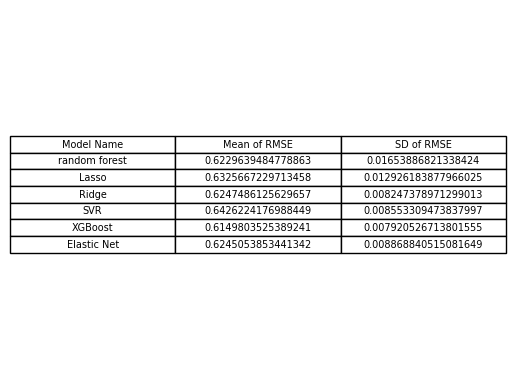

In [168]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create a table and remove the axes
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center')
ax.axis('off')

# Center align the columns
for cell in table._cells.values():
    cell.set_text_props(horizontalalignment='center')

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/models_and_rmse.png'
plt.savefig(file_path, dpi=350)



# Show the plot
plt.show()
# Save the figure
#plt.savefig('dataframe_image.png', dpi=300)

# Show the plot
plt.show()

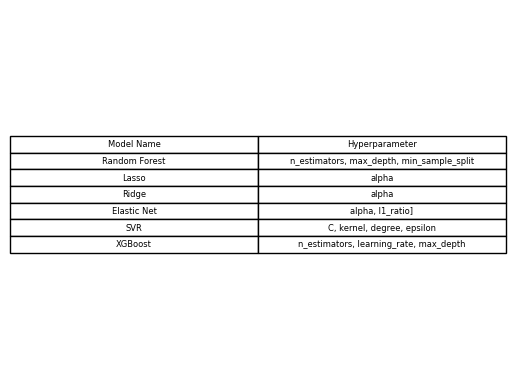

In [148]:
import pandas as pd

data = {
    'Model Name': ['Random Forest', 'Lasso', 'Ridge', 'Elastic Net', 'SVR', 'XGBoost'],
    'Hyperparameter': [
        'n_estimators, max_depth, min_sample_split',
        'alpha',
        'alpha',
        'alpha, l1_ratio]',
        'C, kernel, degree, epsilon',
        'n_estimators, learning_rate, max_depth'
    ],
}

hyper = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a table and remove the axes
table = ax.table(cellText=hyper.values, colLabels=hyper.columns, loc='center')
ax.axis('off')

# Center align the columns
for cell in table._cells.values():
    cell.set_text_props(horizontalalignment='center')

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/models_and_hyper.png'
plt.savefig(file_path, dpi=350)



# Show the plot
plt.show()
# Save the figure
#plt.savefig('dataframe_image.png', dpi=300)

# Show the plot
plt.show()


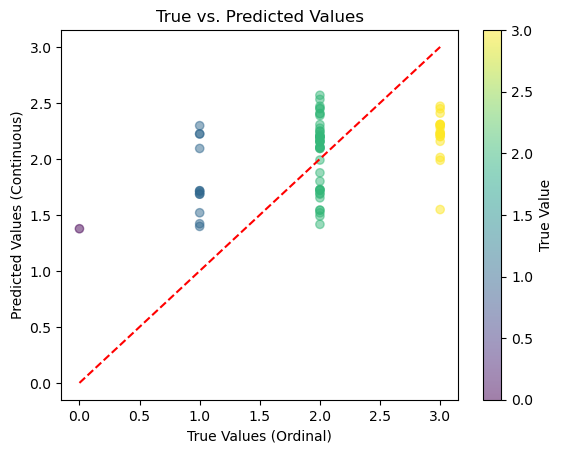

In [147]:
import matplotlib.pyplot as plt

# Assuming y_test and average_predictions are defined
# y_test = [...]
# average_predictions = [...]

# Create a scatter plot
plt.scatter(y_test, new_predict, alpha=0.5, c=y_test, cmap='viridis')

# Plot a line for perfect predictions
plt.plot([0, 3], [0, 3], color='red', linestyle='--')

# Label the axes
plt.xlabel('True Values (Ordinal)')
plt.ylabel('Predicted Values (Continuous)')
plt.title('True vs. Predicted Values')

# Adding a color bar to explain color coding
plt.colorbar(label='True Value')

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/true_pred01.png'
plt.savefig(file_path, dpi=350)


# Show the plot
plt.show()


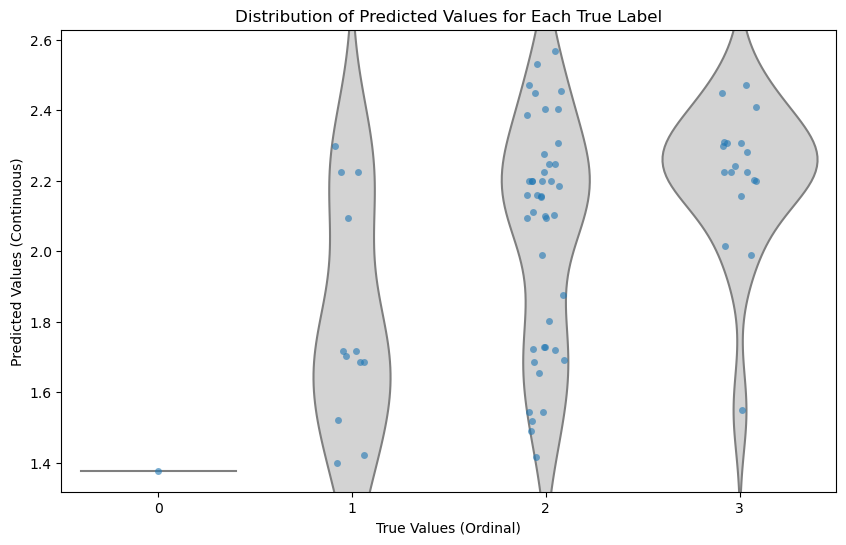

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already found the best model and predicted using X_test
# y_pred = best_model.predict(X_test)  # Uncomment if not already done

# Create a dataframe for plotting (if not already in dataframe format)
import pandas as pd
data = pd.DataFrame({
    'True Label': y_test,
    'Predicted Value': new_predict
})

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a violin plot to show the distribution of predicted values for each true label
sns.violinplot(x='True Label', y='Predicted Value', data=data, inner=None, color='lightgray')

# Overlay a scatter plot to show individual predictions
sns.stripplot(x='True Label', y='Predicted Value', data=data, jitter=True, alpha=0.6)

# Adding titles and labels
plt.title('Distribution of Predicted Values for Each True Label')
plt.xlabel('True Values (Ordinal)')
plt.ylabel('Predicted Values (Continuous)')

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/true_pred02.png'
plt.savefig(file_path, dpi=350)

# Show the plot
plt.show()

[2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 3, 3, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]


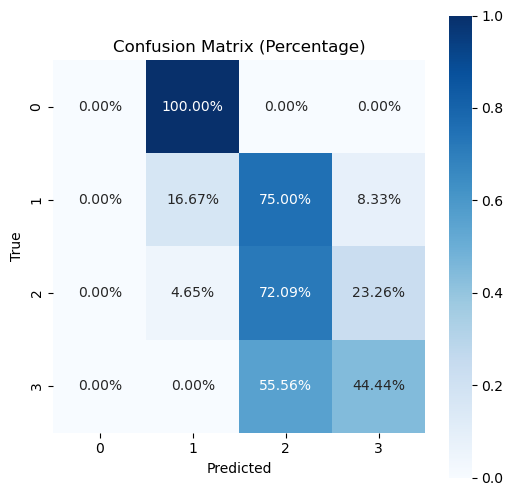

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns



filtered_predictions = []

for prediction in new_predict:
    if 0 <= prediction < 0.75:
        filtered_predictions.append(0)
    elif 0.75 <= prediction < 1.5:
        filtered_predictions.append(1)
    elif 1.5 <= prediction < 2.25:
        filtered_predictions.append(2)
    elif 2.25 <= prediction <= 3:
        filtered_predictions.append(3)

print(filtered_predictions)



# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, filtered_predictions)

# Normalize the confusion matrix by row
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap for the normalized confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", square=True,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/confusion_matrix.png'
plt.savefig(file_path, dpi=350)
plt.show()


In [166]:
# Calculate the mean or median of the target variable
mean_erythema = y_test.mean()
# median_erythema = y_final.median() # Use this if you prefer median

# Predict this mean/median value for all observations
y_pred_baseline = [mean_erythema] * len(y_test)

# Calculate the RMSE
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)

print(rmse_baseline)
results_df

0.6756756756756757


,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.622964,0.016539
1,Lasso,0.632567,0.012926
2,Ridge,0.624749,0.008247
3,SVR,0.642622,0.008553
4,XGBoost,0.614980,0.007921


In [184]:
#filtered_df = results_df[results_df['Model Name'] != 'Ridge']

# Print the remaining rows
#filtered_df

,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.647258,0.003724
1,Lasso,0.632567,0.012926
3,Elastic Net,0.628257,0.013568
4,SVR,0.646501,0.006843
5,KNN,0.663723,0.008088
6,XGBoost,0.627934,0.017606


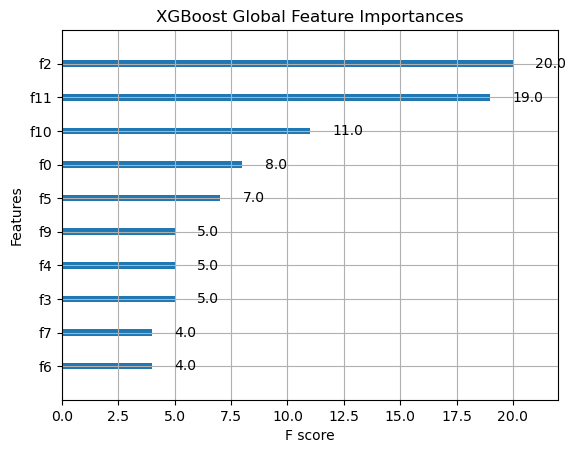

In [32]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_regressor is your trained XGBoost model
# xgb_regressor = ...

# Retrieve the best model
best_model = best_models[min_rmse_index]

# The XGBoost regressor is the second step in your pipeline
trained_xgb_model = best_model.named_steps['algorithm']

xgb_regressor = trained_xgb_model

# Plot global feature importances
xgb.plot_importance(xgb_regressor)
plt.title("XGBoost Global Feature Importances")
plt.show()


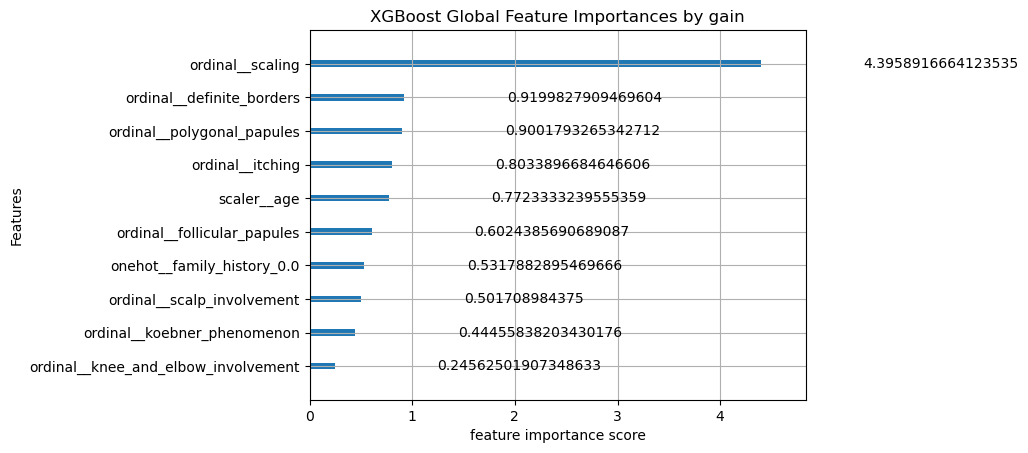

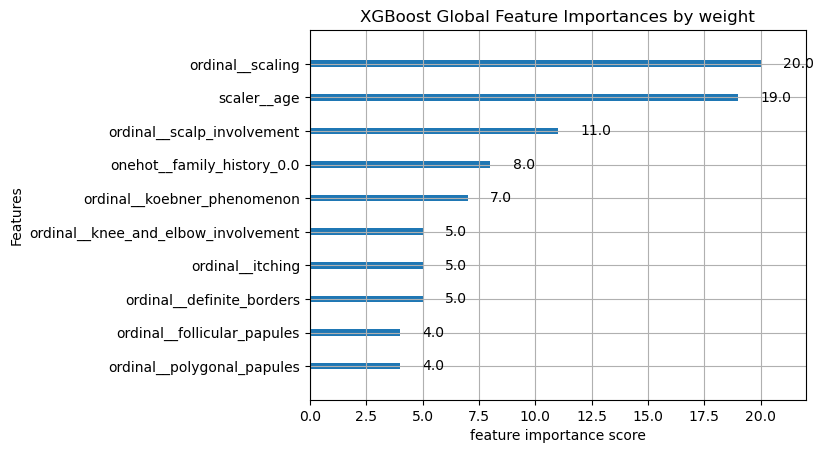

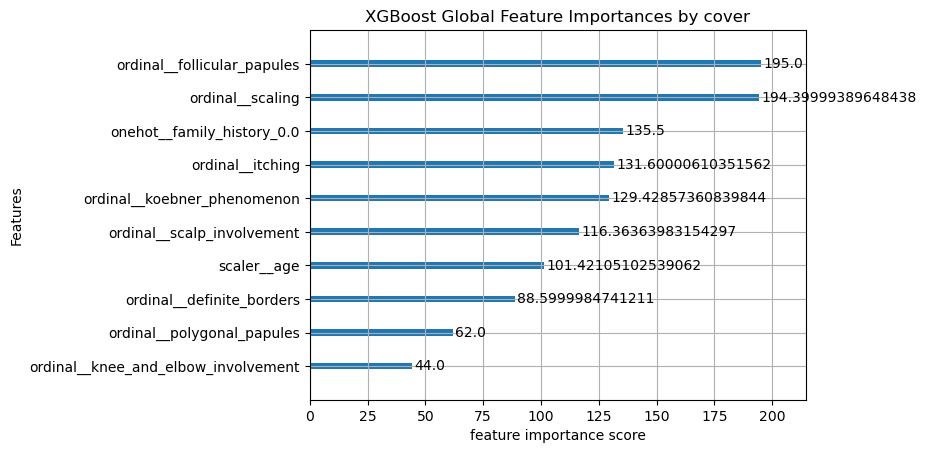

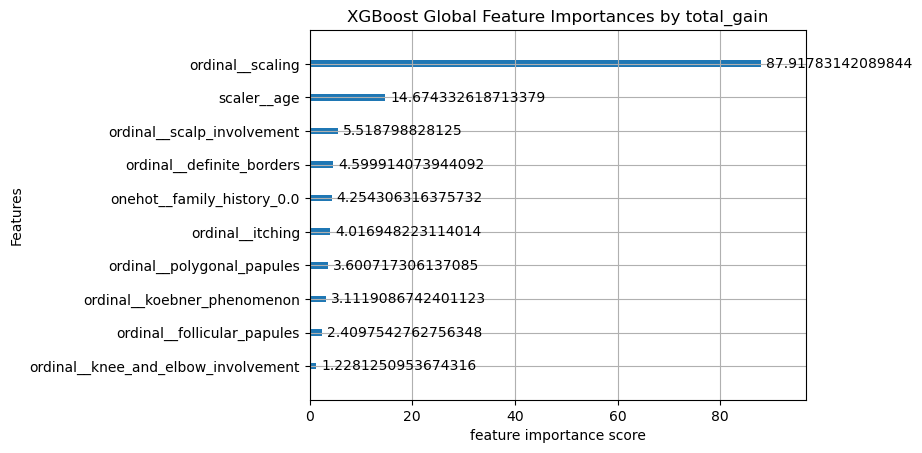

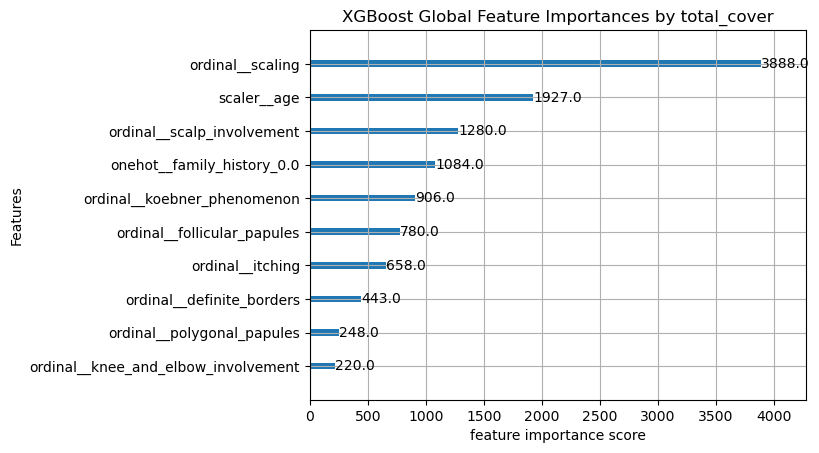

In [104]:
# Print out the names of the steps in the pipeline
#print(best_model.named_steps.keys())

# Replace 'correct_preprocessor_name' with the actual name you found
fitted_preprocessor = best_model.named_steps['preprocessor']


# Get feature names after preprocessing and convert them to a list
feature_names = list(fitted_preprocessor.get_feature_names_out())

# Extract the trained XGBoost model
xgb_regressor = best_model.named_steps['algorithm']

# Assign feature names to the XGBoost model
xgb_regressor.get_booster().feature_names = feature_names

# Plot global feature importances
# Plot global feature importances
feature_importance_criteria = ["gain", "weight", "cover", "total_gain", "total_cover"]
for feature in feature_importance_criteria:
    xgb.plot_importance(xgb_regressor, importance_type=feature)
    plt.title("XGBoost Global Feature Importances by {}".format(feature))
    plt.xlabel('feature importance score')
    plt.show()



<Figure size 1000x600 with 0 Axes>

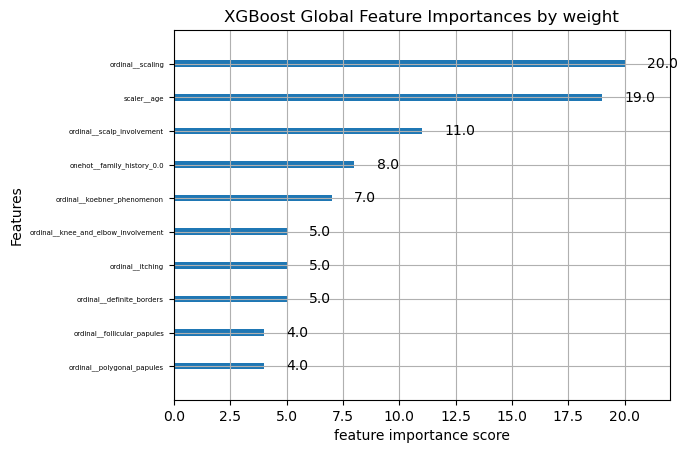

In [185]:
# Plot global feature importances
# Plot global feature importances

# Increase the figure size to accommodate the labels
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed


xgb.plot_importance(xgb_regressor, importance_type='weight')
plt.title("XGBoost Global Feature Importances by weight")
plt.xlabel('feature importance score')

# Make y-axis labels smaller
plt.tick_params(axis='y', labelsize=5) 

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/global01.png'
plt.savefig(file_path, dpi=350)

plt.show()

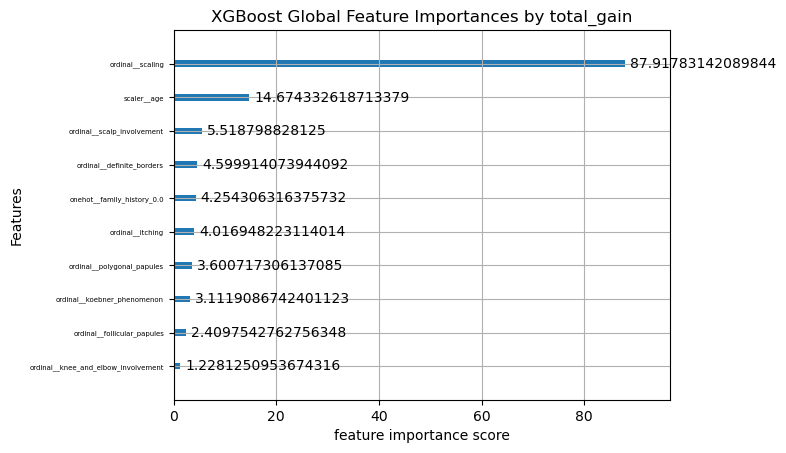

In [157]:
# Plot global feature importances
# Plot global feature importances


xgb.plot_importance(xgb_regressor, importance_type='total_gain')
plt.title("XGBoost Global Feature Importances by total_gain")
plt.xlabel('feature importance score')

# Make y-axis labels smaller
plt.tick_params(axis='y', labelsize=5) 


# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/global02.png'
plt.savefig(file_path, dpi=350)

plt.show()

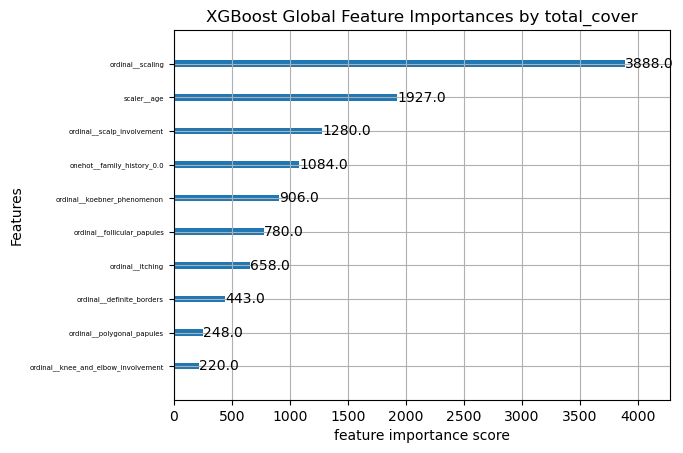

In [158]:
# Plot global feature importances
# Plot global feature importances


xgb.plot_importance(xgb_regressor, importance_type='total_cover')
plt.title("XGBoost Global Feature Importances by total_cover")
plt.xlabel('feature importance score')

# Make y-axis labels smaller
plt.tick_params(axis='y', labelsize=5) 


# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/global03.png'
plt.savefig(file_path, dpi=350)

plt.show()

In [60]:
dff = pd.read_csv('/Users/suchen/Desktop/Data1030 HW/dermatology_database_1.csv')
# make a subset of the data, removing the "medical terms" features because they are too academic to understand
dff = dff.iloc[:, list(range(0, 11)) + [33]]
#df1.info()

# create x and target variable y
X_local = dff.loc[:, dff.columns != 'erythema']
y_local = dff['erythema']


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import pandas as pd



# Replace '?' with NaN and convert columns to numeric where appropriate
X_local = X_local.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')

# Define random state
random_state = 42

# Stratified train-test split
X_other0, X_test0, y_other0, y_test0 = train_test_split(
    X_local, y_local, test_size=0.2, stratify=y_local, random_state=random_state)
print('Test balance:', np.unique(y_test0, return_counts=True))



# Transform X_test using the imputer fitted on the last fold of X_other
X_test_imputed0 = iterative_imputer.transform(X_test0)
X_test0 = pd.DataFrame(X_test_imputed, columns=X_local.columns)

Test balance: (array([0, 1, 2, 3]), array([ 1, 12, 43, 18]))


In [181]:
import shap

# Assuming 'best_model' is the best model from your GridSearchCV results
best_model = best_models[test_scores.index(min(test_scores))]

# Extract the trained XGBoost model from the pipeline
xgb_model = best_model.named_steps['algorithm']

# Create a background dataset from the preprocessed training data
# Use the combined_preprocessor to transform a sample of X_train
background_data = combined_preprocessor.fit_transform(X_train.sample(100, random_state=0))

# Create a SHAP explainer using the XGBoost model
explainer = shap.KernelExplainer(model=xgb_model.predict, data=background_data)

# Compute SHAP values for a single prediction or a set of predictions
# Preprocess the instance from X_test before passing it to shap_values
# Use combined_preprocessor to transform the test instance
single_instance = combined_preprocessor.transform(X_test.iloc[0:1, :])
shap_values = explainer.shap_values(single_instance)

# Plot SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, single_instance)


  0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
# Fit and transform a sample of X_train to get feature names
background_data = combined_preprocessor.fit_transform(X_train.sample(100, random_state=0))

# Get feature names from the preprocessor
feature_names = combined_preprocessor.get_feature_names_out()


In [48]:
# Preprocess the test instance
single_instance = combined_preprocessor.transform(X_test.iloc[0:1, :])

# Convert single instance to DataFrame with feature names
single_instance_df = pd.DataFrame(single_instance, columns=feature_names)


In [109]:
import pandas as pd
import shap

# Convert background data and single instance to DataFrame with feature names
background_data_df = pd.DataFrame(background_data, columns=feature_names)
single_instance_df = pd.DataFrame(single_instance, columns=feature_names)

# Assuming 'best_model' is the best model from your GridSearchCV results
best_model = best_models[test_scores.index(min(test_scores))]

# Extract the trained XGBoost model from the pipeline
xgb_model = best_model.named_steps['algorithm']


# Create a SHAP TreeExplainer using the XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the single instance
shap_values = explainer.shap_values(single_instance_df)

# Plot SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], single_instance_df.iloc[0,:])


In [139]:
import pandas as pd
import shap

# Fit the preprocessor with the training data
combined_preprocessor.fit(X_train)


# Preprocess X_test using the same preprocessor as used for training
X_test_preprocessed = combined_preprocessor.transform(X_test)

# Assuming 'best_model' is the best model from your GridSearchCV results
best_model = best_models[test_scores.index(min(test_scores))]

# Extract the trained XGBoost model from the pipeline
xgb_model = best_model.named_steps['algorithm']


# Create a SHAP TreeExplainer using the XGBoost model
explainer = shap.TreeExplainer(xgb_model)



# Compute SHAP values for the preprocessed test data
shap_values = explainer.shap_values(X_test_preprocessed)

shap_sum = np.abs(shap_values).mean(axis=0)

# Get feature names from the preprocessor
feature_names = list(fitted_preprocessor.get_feature_names_out())

# If X_test_preprocessed is a numpy array, create a DataFrame for plotting purposes
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)


top_indices = np.argsort(shap_sum)[-10:]
top_features = np.array(feature_names)[top_indices]
shap_values_top = shap_values[:, top_indices]


# Plot SHAP values for the first prediction in the test set
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values[10], X_test_preprocessed_df.iloc[0], show = False)

# Save the figure
# Save the figure




In [65]:
shap_values

array([[-1.06895622e-02,  0.00000000e+00,  1.42631426e-01,
         1.06353210e-02,  1.18157975e-02, -5.95146641e-02,
        -5.24820667e-03,  7.05089141e-03,  0.00000000e+00,
         1.62689912e-03, -1.91816688e-02,  2.11309381e-02],
       [-1.06895622e-02,  0.00000000e+00,  1.46033704e-01,
         1.45352604e-02,  1.18157975e-02,  4.25568819e-02,
         1.18775228e-02,  7.05089141e-03,  0.00000000e+00,
         1.62689912e-03, -1.91816688e-02,  1.73294619e-02],
       [-7.07209390e-03,  0.00000000e+00,  1.66764066e-01,
         1.59222633e-03,  1.66166574e-02, -5.95146641e-02,
        -5.24820667e-03,  2.88439868e-03,  0.00000000e+00,
        -2.03965716e-02,  4.25474830e-02, -1.25595659e-01],
       [-1.06895622e-02,  0.00000000e+00,  1.99663371e-01,
         7.94092566e-03,  1.18157975e-02,  3.78625095e-02,
        -5.24820667e-03,  3.98021098e-03,  0.00000000e+00,
         1.62689912e-03,  5.96212149e-02, -1.00476071e-02],
       [-1.06895622e-02,  0.00000000e+00,  1.8293680

In [179]:
X_train.info()

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   scaling                     195 non-null    float64
 1   definite_borders            195 non-null    float64
 2   itching                     195 non-null    float64
 3   koebner_phenomenon          195 non-null    float64
 4   polygonal_papules           195 non-null    float64
 5   follicular_papules          195 non-null    float64
 6   oral_mucosal_involvement    195 non-null    float64
 7   knee_and_elbow_involvement  195 non-null    float64
 8   scalp_involvement           195 non-null    float64
 9   family_history              195 non-null    float64
 10  age                         195 non-null    float64
dtypes: float64(11)
memory usage: 16.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Colu

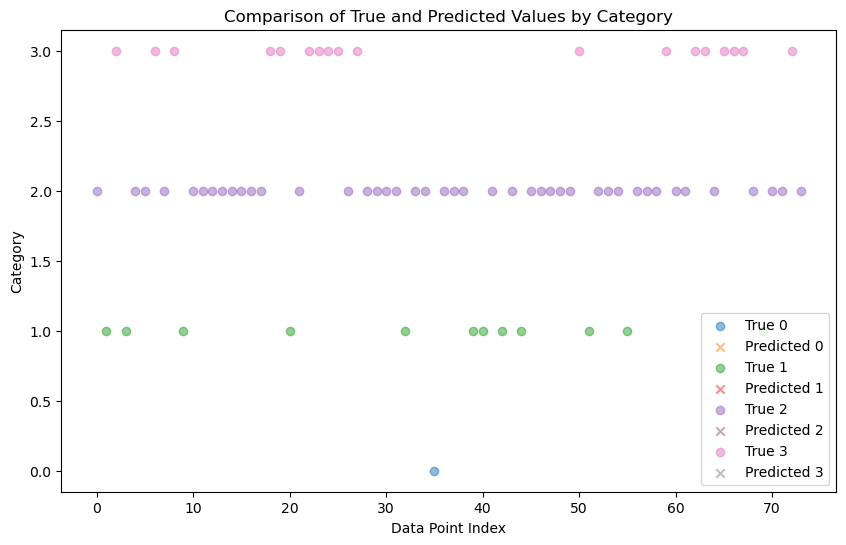

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already found the best model and predicted using X_test
# y_pred = best_model.predict(X_test)  # Uncomment if not already done

# Set up the figure
plt.figure(figsize=(10, 6))

# Unique categories in the target variable
categories = [0, 1, 2, 3]

# Plot for each category
for category in categories:
    # Boolean arrays for true and predicted values of this category
    is_true_category = (y_test == category)
    is_pred_category = (y_pred == category)

    # Indices for plotting
    indices = np.arange(len(y_test))

    # Scatter plot for true values of this category
    plt.scatter(indices[is_true_category], y_test[is_true_category], alpha=0.5, label=f'True {category}', marker='o')

    # Scatter plot for predicted values of this category
    plt.scatter(indices[is_pred_category], y_pred[is_pred_category], alpha=0.5, label=f'Predicted {category}', marker='x')

# Adding titles, labels, and legend
plt.title('Comparison of True and Predicted Values by Category')
plt.xlabel('Data Point Index')
plt.ylabel('Category')
plt.legend()

# Show the plot
plt.show()


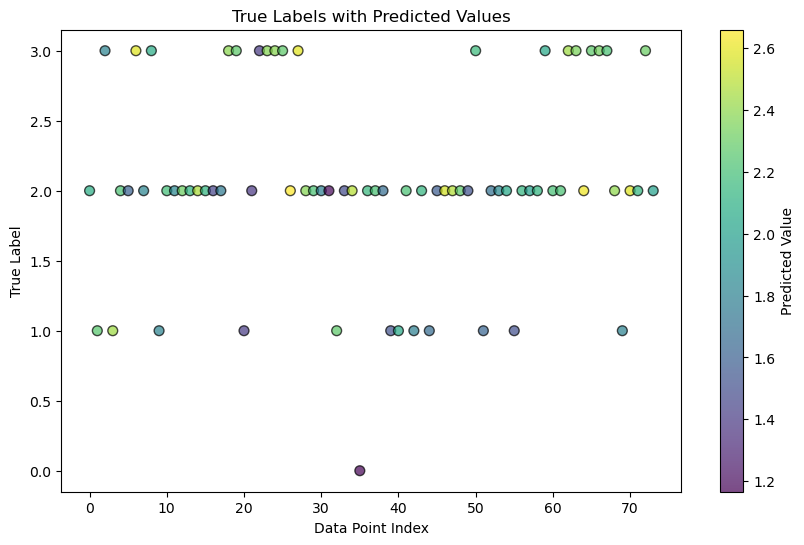

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already found the best model and predicted using X_test
# y_pred = best_model.predict(X_test)  # Uncomment if not already done

# Set up the figure
plt.figure(figsize=(10, 6))

# Indices for plotting
indices = np.arange(len(y_test))

# Scatter plot
scatter = plt.scatter(indices, y_test, alpha=0.7, c=y_pred, cmap='viridis', edgecolor='k', s=50)

# Color bar indicating predicted values
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Value')

# Adding titles and labels
plt.title('True Labels with Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('True Label')

# Show the plot
plt.show()


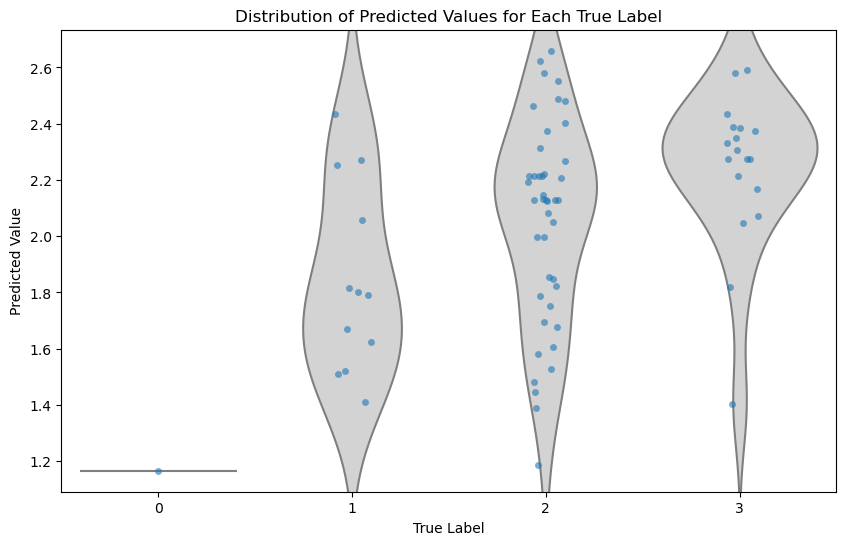

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already found the best model and predicted using X_test
# y_pred = best_model.predict(X_test)  # Uncomment if not already done

# Create a dataframe for plotting (if not already in dataframe format)
import pandas as pd
data = pd.DataFrame({
    'True Label': y_test,
    'Predicted Value': y_pred
})

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a violin plot to show the distribution of predicted values for each true label
sns.violinplot(x='True Label', y='Predicted Value', data=data, inner=None, color='lightgray')

# Overlay a scatter plot to show individual predictions
sns.stripplot(x='True Label', y='Predicted Value', data=data, jitter=True, alpha=0.6)

# Adding titles and labels
plt.title('Distribution of Predicted Values for Each True Label')
plt.xlabel('True Label')
plt.ylabel('Predicted Value')

# Show the plot
plt.show()


In [137]:
results_df

,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.647258,0.003724
1,Lasso,0.632567,0.012926
2,Ridge,0.625203,0.000000
3,Elastic Net,0.628257,0.013568
4,SVR,0.646501,0.006843
5,KNN,0.663723,0.008088
6,XGBoost,0.627934,0.017606


In [138]:


# Calculate the mean or median of the target variable
mean_erythema = y_final.mean()
# median_erythema = y_final.median() # Use this if you prefer median

# Predict this mean/median value for all observations
y_pred_baseline = [mean_erythema] * len(y_final)

# Calculate the RMSE
mse_baseline = mean_squared_error(y_final, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)

print(f"Baseline RMSE: {rmse_baseline}")


Baseline RMSE: 0.6638444698329595


In [68]:
results_df

,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.622964,0.016539
1,Lasso,0.632567,0.012926
2,Ridge,0.624749,0.008247
3,Elastic Net,0.624505,0.008869
4,SVR,0.642622,0.008553
5,XGBoost,0.614980,0.007921


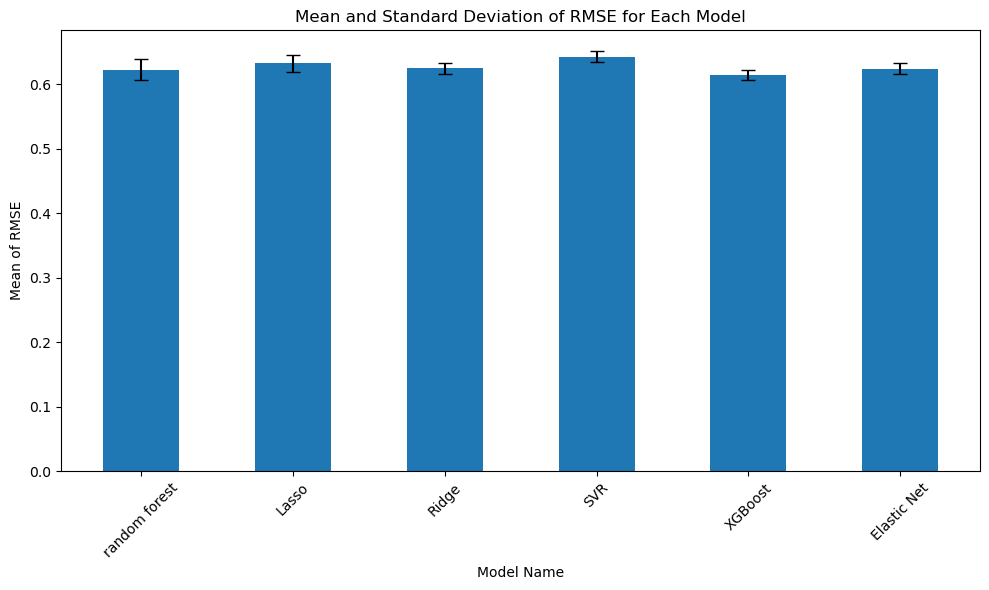

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results_df is your DataFrame and it's already defined
# Example structure of results_df:
# results_df = pd.DataFrame({
#     'model name': ['Model A', 'Model B', 'Model C'],
#     'mean of rmse': [1.2, 1.5, 1.3],
#     'sd of rmse': [0.1, 0.2, 0.15]
# })

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model Name'], results_df['Mean of RMSE'], yerr=results_df['SD of RMSE'], capsize=5, width = 0.5)
plt.xlabel('Model Name')
plt.ylabel('Mean of RMSE')
plt.title('Mean and Standard Deviation of RMSE for Each Model')
plt.xticks(rotation=45) # Rotates the model names for better visibility
plt.tight_layout()

# Save the figure
file_path = '/Users/suchen/Desktop/Data1030 HW/final/model_performance.png'
plt.savefig(file_path, dpi=350)


# Show the plot
plt.show()


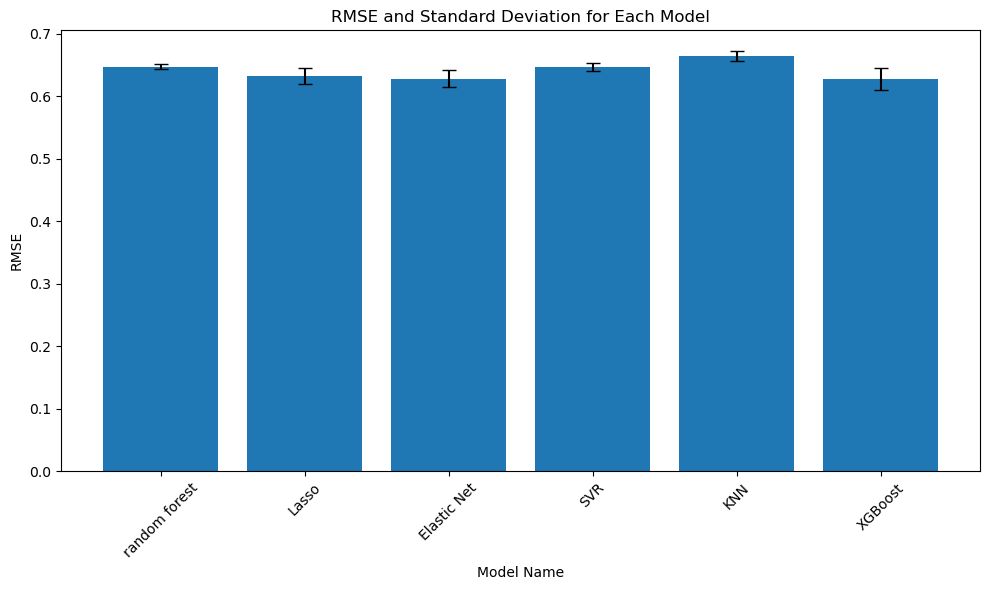

In [185]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Model Name'], filtered_df['Mean of RMSE'], yerr=filtered_df['SD of RMSE'], capsize=5)
plt.xlabel('Model Name')
plt.ylabel('RMSE')
plt.title('RMSE and Standard Deviation for Each Model')
plt.xticks(rotation=45) # Rotates the model names for better visibility
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# use it as a classification problem 
# one more time
# -------------------
# --------------------
# --------------------

In [ ]:
df2 = pd.read_csv('/Users/suchen/Desktop/Data1030 HW/dermatology_database_1.csv')
# make a subset of the data, removing the "medical terms" features because they are too academic to understand
df3 = df2.iloc[:, list(range(0, 11)) + [33]]
#df1.info()

# create x and target variable y
X_final = df3.loc[:, df3.columns != 'erythema']
y_final = df3['erythema']

In [74]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import pandas as pd



# Replace '?' with NaN and convert columns to numeric where appropriate
X_final = X_final.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')

# Define random state
random_state = 42

# Stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(
    X_final, y_final, test_size=0.2, stratify=y_final, random_state=random_state)
print('Test balance:', np.unique(y_test, return_counts=True))

# Stratified K-Fold on X_other
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

for train_index, val_index in kf.split(X_other, y_other):
    print('New fold')
    
    # Split the data into training and validation sets
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]

    # Instantiate the imputer
    iterative_imputer = IterativeImputer(random_state=random_state)

    # Fit the imputer on X_train and transform X_train
    X_train_imputed = iterative_imputer.fit_transform(X_train)

    # Transform X_val using the already fitted imputer
    X_val_imputed = iterative_imputer.transform(X_val)

    # Convert the imputed data back into pandas DataFrames
    X_train = pd.DataFrame(X_train_imputed, columns=X_final.columns)
    X_val = pd.DataFrame(X_val_imputed, columns=X_final.columns)

    print(np.unique(y_train, return_counts=True))
    print(np.unique(y_val, return_counts=True))

# Transform X_test using the imputer fitted on the last fold of X_other
X_test_imputed = iterative_imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed, columns=X_final.columns)

Test balance: (array([0, 1, 2, 3]), array([ 1, 12, 43, 18]))
New fold
(array([0, 1, 2, 3]), array([  2,  30, 114,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 58, 24]))
New fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))
New fold
(array([0, 1, 2, 3]), array([  2,  30, 115,  48]))
(array([0, 1, 2, 3]), array([ 1, 15, 57, 24]))


In [77]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

def MLpipe_KFold_Classification(X_train, X_test, y_train, y_test, 
                               preprocessor, algorithm, param_grid, 
                               algorithm_random_state=None):
    """
    This function applies KFold with 4 folds to the training data and uses GridSearchCV for hyperparameter tuning.
    The accuracy is maximized in cross-validation.

    Parameters remain the same as your original function.
    """
    if algorithm_random_state is None:
        random_states = np.arange(10)  # 10 different random states
    else:
        random_states = algorithm_random_state
        
    best_models = []
    test_scores = []

    algorithm_has_random_state = 'random_state' in algorithm.get_params()

    for random_state in random_states:
        print(f"Random State: {random_state}")

        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('algorithm', algorithm)
        ])

        if algorithm_has_random_state and random_state is not None:
            algorithm.set_params(**{'random_state': random_state})

        # Change here: Using 'accuracy' as scoring metric
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        print(f"Best parameters: {grid_search.best_params_}")

        y_pred = grid_search.predict(X_test)

        # Change here: Using accuracy for evaluation
        accuracy = accuracy_score(y_test, y_pred)
        test_scores.append(accuracy)
        print(f"Test Accuracy: {accuracy}\n")

        best_models.append(grid_search.best_estimator_)

    print(f"Mean Test Accuracy: {np.mean(test_scores)}")
    print(f"Standard Deviation of Test Accuracy: {np.std(test_scores)}")
    print(y_pred)

    return best_models, test_scores


In [78]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Algorithm for Classification
random_forest_classifier = RandomForestClassifier()  # Initialize RandomForestClassifier

param_grid_rf = {
    'algorithm__n_estimators': [100, 200, 300],   # Example hyperparameters
    'algorithm__max_depth': [None, 10, 20],       # Example hyperparameters
    'algorithm__min_samples_split': [2, 5, 10]    # Example hyperparameters
}

best_models, test_scores = MLpipe_KFold_Classification(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=random_forest_classifier, param_grid=param_grid_rf
)


Random State: 0
Best parameters: {'algorithm__max_depth': 10, 'algorithm__min_samples_split': 5, 'algorithm__n_estimators': 100}
Test Accuracy: 0.5

Random State: 1
Best parameters: {'algorithm__max_depth': 10, 'algorithm__min_samples_split': 5, 'algorithm__n_estimators': 100}
Test Accuracy: 0.527027027027027

Random State: 2
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 10, 'algorithm__n_estimators': 200}
Test Accuracy: 0.4864864864864865

Random State: 3
Best parameters: {'algorithm__max_depth': None, 'algorithm__min_samples_split': 10, 'algorithm__n_estimators': 200}
Test Accuracy: 0.47297297297297297

Random State: 4
Best parameters: {'algorithm__max_depth': 10, 'algorithm__min_samples_split': 2, 'algorithm__n_estimators': 200}
Test Accuracy: 0.5135135135135135

Random State: 5
Best parameters: {'algorithm__max_depth': 10, 'algorithm__min_samples_split': 10, 'algorithm__n_estimators': 200}
Test Accuracy: 0.4864864864864865

Random State: 6
Best par

In [79]:
# Find the index of the model with the lowest RMSE
min_rmse_index = test_scores.index(min(test_scores))


print()
new_predict01 = best_models[min_rmse_index].predict(X_test)
print(new_predict01)


[2 2 2 3 2 2 3 2 2 2 3 2 2 2 3 2 1 2 2 2 1 1 2 3 3 2 3 3 3 2 2 1 2 1 3 2 2
 2 2 1 2 2 2 2 2 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 2 3 2 2 2]


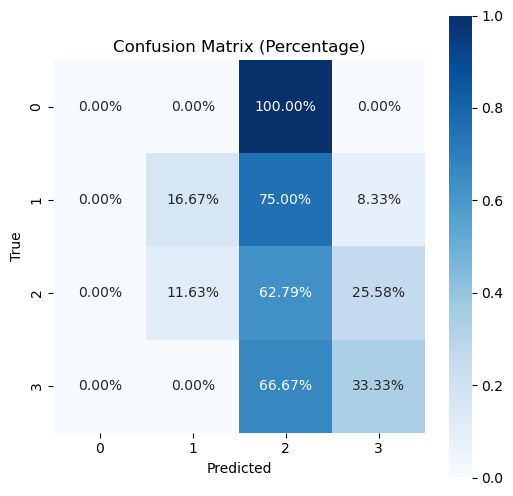

In [80]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, new_predict01)

# Normalize the confusion matrix by row
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap for the normalized confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", square=True,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()


In [76]:
# Create an empty DataFrame with the desired columns
results_class = pd.DataFrame(columns=['Model Name', 'Mean of RMSE', 'SD of RMSE'])

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'random forest'

# Check if the model name already exists in the DataFrame
if model_name in results_class['Model Name'].values:
    # Update the existing row
    results_class.loc[results_class['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_class.loc[results_class['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_class = pd.concat([results_class, new_row], ignore_index=True)

In [128]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with increased max_iter and different solver
logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')

param_grid_lr = {
    'algorithm__C': [0.01, 0.1, 1, 10, 100],  # Example regularization parameter
    # Removed 'sag' and 'saga' from solvers to focus on 'lbfgs' and 'newton-cg'
    'algorithm__solver': ['newton-cg', 'lbfgs'] 
}

best_models, test_scores = MLpipe_KFold_Classification(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=logistic_regression, param_grid=param_grid_lr
)


# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'logistic'

# Check if the model name already exists in the DataFrame
if model_name in results_class['Model Name'].values:
    # Update the existing row
    results_class.loc[results_class['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_class.loc[results_class['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_class = pd.concat([results_class, new_row], ignore_index=True)

Random State: 0
Best parameters: {'algorithm__C': 0.01, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.581081081081081

Random State: 1
Best parameters: {'algorithm__C': 0.1, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.5675675675675675

Random State: 2
Best parameters: {'algorithm__C': 1, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.5135135135135135

Random State: 3
Best parameters: {'algorithm__C': 1, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.5135135135135135

Random State: 4
Best parameters: {'algorithm__C': 0.01, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.581081081081081

Random State: 5
Best parameters: {'algorithm__C': 0.01, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.581081081081081

Random State: 6
Best parameters: {'algorithm__C': 1, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.5135135135135135

Random State: 7
Best parameters: {'algorithm__C': 0.1, 'algorithm__solver': 'newton-cg'}
Test Accuracy: 0.5675675675675675

Random State: 

In [129]:
from sklearn.svm import SVC

# SVM Classifier for Multi-class Classification
svm_classifier = SVC()  # Initialize SVM Classifier

# Define the parameter grid for SVM
param_grid_svm = {
    'algorithm__C': [0.1, 1, 10, 100],   # Regularization parameter
    'algorithm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Type of kernel
    'algorithm__gamma': ['scale', 'auto']  # Kernel coefficient
}

best_models, test_scores = MLpipe_KFold_Classification(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=svm_classifier, param_grid=param_grid_svm
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'SVM'

# Check if the model name already exists in the DataFrame
if model_name in results_class['Model Name'].values:
    # Update the existing row
    results_class.loc[results_class['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_class.loc[results_class['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_class = pd.concat([results_class, new_row], ignore_index=True)

Random State: 0
Best parameters: {'algorithm__C': 0.1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'poly'}
Test Accuracy: 0.5675675675675675

Random State: 1
Best parameters: {'algorithm__C': 0.1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'linear'}
Test Accuracy: 0.581081081081081

Random State: 2
Best parameters: {'algorithm__C': 0.1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'poly'}
Test Accuracy: 0.5675675675675675

Random State: 3
Best parameters: {'algorithm__C': 1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'poly'}
Test Accuracy: 0.44594594594594594

Random State: 4
Best parameters: {'algorithm__C': 0.1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'linear'}
Test Accuracy: 0.581081081081081

Random State: 5
Best parameters: {'algorithm__C': 1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'sigmoid'}
Test Accuracy: 0.6351351351351351

Random State: 6
Best parameters: {'algorithm__C': 1, 'algorithm__gamma': 'scale', 'algorithm__kernel': 'sigmoi

In [130]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier for Multi-class Classification
knn_classifier = KNeighborsClassifier()  # Initialize KNN Classifier

# Define the parameter grid for KNN
param_grid_knn = {
    'algorithm__n_neighbors': [3, 5, 10, 15],  # Number of neighbors
    'algorithm__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

best_models, test_scores = MLpipe_KFold_Classification(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=knn_classifier, param_grid=param_grid_knn
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'KNN'

# Check if the model name already exists in the DataFrame
if model_name in results_class['Model Name'].values:
    # Update the existing row
    results_class.loc[results_class['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_class.loc[results_class['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_class = pd.concat([results_class, new_row], ignore_index=True)

Random State: 0
Best parameters: {'algorithm__metric': 'euclidean', 'algorithm__n_neighbors': 15, 'algorithm__weights': 'distance'}
Test Accuracy: 0.4864864864864865

Random State: 1
Best parameters: {'algorithm__metric': 'euclidean', 'algorithm__n_neighbors': 10, 'algorithm__weights': 'distance'}
Test Accuracy: 0.5135135135135135

Random State: 2
Best parameters: {'algorithm__metric': 'euclidean', 'algorithm__n_neighbors': 10, 'algorithm__weights': 'uniform'}
Test Accuracy: 0.527027027027027

Random State: 3
Best parameters: {'algorithm__metric': 'manhattan', 'algorithm__n_neighbors': 10, 'algorithm__weights': 'uniform'}
Test Accuracy: 0.47297297297297297

Random State: 4
Best parameters: {'algorithm__metric': 'manhattan', 'algorithm__n_neighbors': 15, 'algorithm__weights': 'distance'}
Test Accuracy: 0.5405405405405406

Random State: 5
Best parameters: {'algorithm__metric': 'euclidean', 'algorithm__n_neighbors': 15, 'algorithm__weights': 'uniform'}
Test Accuracy: 0.527027027027027

Ra

In [135]:
from xgboost import XGBClassifier

# XGBoost Classifier for Multi-class Classification
xgboost_classifier = XGBClassifier()  # Initialize XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'algorithm__n_estimators': [100, 200, 300],  # Number of trees
    'algorithm__max_depth': [3, 6, 9],          # Depth of each tree
    'algorithm__learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'algorithm__subsample': [0.7, 0.8, 1],      # Subsample ratio of the training instances
    'algorithm__colsample_bytree': [0.7, 0.8, 1] # Subsample ratio of columns for each split
}

best_models, test_scores = MLpipe_KFold_Classification(
    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
    preprocessor=combined_preprocessor, algorithm=xgboost_classifier, param_grid=param_grid_xgb
)

# Assuming you have calculated the mean and SD of RMSE
mean_rmse = np.mean(test_scores)
std_rmse = np.std(test_scores)

# Define the model name
model_name = 'XGBoost'

# Check if the model name already exists in the DataFrame
if model_name in results_class['Model Name'].values:
    # Update the existing row
    results_class.loc[results_class['Model Name'] == model_name, 'Mean of RMSE'] = mean_rmse
    results_class.loc[results_class['Model Name'] == model_name, 'SD of RMSE'] = std_rmse
else:
    # Create a new DataFrame for the row to be added
    new_row = pd.DataFrame({'Model Name': [model_name], 
                            'Mean of RMSE': [mean_rmse], 
                            'SD of RMSE': [std_rmse]})
    
    # Append the new row
    results_class = pd.concat([results_class, new_row], ignore_index=True)

Random State: 0
Best parameters: {'algorithm__colsample_bytree': 0.8, 'algorithm__learning_rate': 0.01, 'algorithm__max_depth': 3, 'algorithm__n_estimators': 300, 'algorithm__subsample': 1}
Test Accuracy: 0.5540540540540541

Random State: 1
Best parameters: {'algorithm__colsample_bytree': 0.7, 'algorithm__learning_rate': 0.01, 'algorithm__max_depth': 3, 'algorithm__n_estimators': 100, 'algorithm__subsample': 0.7}
Test Accuracy: 0.47297297297297297

Random State: 2
Best parameters: {'algorithm__colsample_bytree': 1, 'algorithm__learning_rate': 0.01, 'algorithm__max_depth': 3, 'algorithm__n_estimators': 200, 'algorithm__subsample': 0.7}
Test Accuracy: 0.47297297297297297

Random State: 3
Best parameters: {'algorithm__colsample_bytree': 0.7, 'algorithm__learning_rate': 0.01, 'algorithm__max_depth': 3, 'algorithm__n_estimators': 100, 'algorithm__subsample': 0.8}
Test Accuracy: 0.5135135135135135

Random State: 4
Best parameters: {'algorithm__colsample_bytree': 0.7, 'algorithm__learning_rat

In [136]:
results_class

,Model Name,Mean of RMSE,SD of RMSE
0,random forest,0.500000,0.020044
1,logistic,0.558108,0.029637
2,SVM,0.581081,0.052338
3,KNN,0.516216,0.019861
4,XGBoost,0.518919,0.030338
